# **Setup**

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# pip install sentinelhub
from sentinelhub import SHConfig, SentinelHubRequest, SentinelHubDownloadClient, \
                        DataCollection, MimeType, CRS, BBox

from rasterio.plot import show

In [4]:
# Create a configuration object
config = SHConfig()

# Set your Sentinel Hub instance ID
config.instance_id = '' #'your-instance-id'
config.sh_client_id = '' #'your-client-id'
config.sh_client_secret = '' # 'your-client-secret'

In [14]:
# Create a bounding box for the area you are interested in
bbox_coords_wgs84 = [14.14, 46.05, 14.15, 46.06]
bbox = BBox(bbox_coords_wgs84, crs=CRS.WGS84)

# Create a SentinelHubRequest object
request = SentinelHubRequest(
    evalscript="return [B04,B03,B02];",
    input_data=[
        SentinelHubRequest.input_data(data_collection=DataCollection.SENTINEL2_L1C,
            time_interval=('2020-06-01','2020-06-30'),)],
    responses=[SentinelHubRequest.output_response('default', MimeType.PNG)],
    bbox=bbox,
    config=config,
)

request

In [20]:
type(request.get_data())

list

In [21]:
len(request.get_data())

1

In [22]:
# Download the data
image = request.get_data()[0]

In [25]:
type(image)

numpy.ndarray

In [26]:
image.shape

(256, 256, 3)

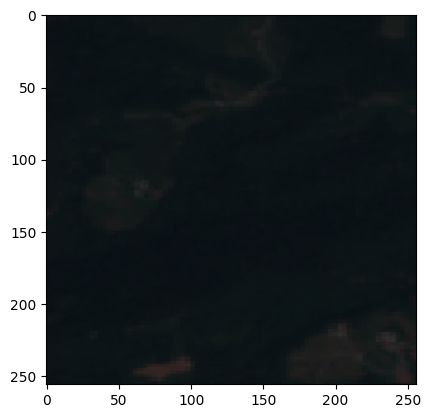

In [23]:
# Display the image
plt.imshow(image)
plt.show()

TypeError: Invalid shape (256, 3, 256) for image data

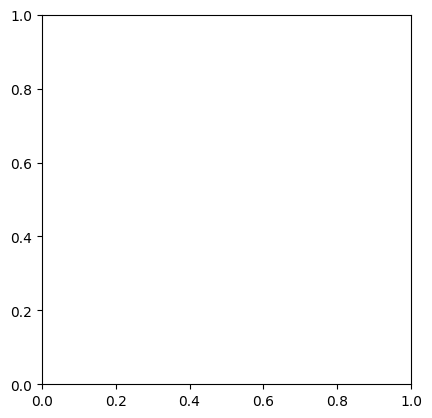

In [24]:
show(image)